In [8]:
import h5py
import numpy as np
import math

def load_dataset():
    train_dataset = h5py.File(r"C:\Users\pssrg\Downloads\Image-Classification-Cat-vs-Non-Cat-master\Image-Classification-Cat-vs-Non-Cat-master\datasets\train_catvnoncat.h5", "r")
    test_dataset = h5py.File(r"C:\Users\pssrg\Downloads\Image-Classification-Cat-vs-Non-Cat-master\Image-Classification-Cat-vs-Non-Cat-master\datasets\test_catvnoncat.h5", "r")

    # Load training data
    X_train = np.array(train_dataset["train_set_x"][:])  # shape: (m_train, 64, 64, 3)
    Y_train = np.array(train_dataset["train_set_y"][:])  # shape: (m_train,)

    # Load test data
    X_test = np.array(test_dataset["test_set_x"][:])     # shape: (m_test, 64, 64, 3)
    Y_test = np.array(test_dataset["test_set_y"][:])     # shape: (m_test,)

    # Reshape labels to (1, m)
    Y_train = Y_train.reshape(1, Y_train.shape[0])
    Y_test = Y_test.reshape(1, Y_test.shape[0])

    return X_train, Y_train, X_test, Y_test
X_train, Y_train, X_test, Y_test = load_dataset()

# Normalize pixel values to range [0, 1]
X_train = X_train / 255.
X_test = X_test / 255.

# Flatten each image to a column vector
X_train = X_train.reshape(X_train.shape[0], -1).T  # shape: (12288, m_train)
X_test = X_test.reshape(X_test.shape[0], -1).T     # shape: (12288, m_test)
print(X_train.shape, X_test.shape, Y_train.shape, Y_test.shape)

def logistic_regression(z):
    return 1/(1+np.exp(-z))

def ReLu(z):
    return np.maximum(0,z)

def ReLu_derivative(Z):
    return (Z > 0).astype(float)

def Training(X, Y):
    W1 = np.random.randn(X.shape[0], 20)*np.sqrt(2 / X.shape[0])
    b1 = np.zeros((20,1))
    W2 = np.random.randn(20,1)*np.sqrt(2 / 20)
    b2 = np.zeros((1,1))
    training = 13000
    lr = 0.005
    for i in range(training):
        Z1 = np.dot(W1.T,X) + b1
        A1 = ReLu(Z1)
        Z2 = np.dot(W2.T,A1) + b2
        a = logistic_regression(Z2)
        loss = -np.mean(Y*np.log(a + 1e-8) + (1-Y)*np.log(1-a + 1e-8))
        dZ2 = a - Y
        dZ1 = np.dot(W2, dZ2)*ReLu_derivative(Z1)
        dW2 = np.dot(A1, dZ2.T)/X.shape[1]
        db2 = np.sum(dZ2, axis = 1, keepdims = True)/dZ2.shape[1]
        dW1 = np.dot(X, dZ1.T)/X.shape[1]
        db1 = np.sum(dZ1, axis = 1, keepdims = True)/dZ1.shape[1]
        W1 -= lr*dW1
        b1 -= lr*db1
        W2 -= lr*dW2
        b2 -= lr*db2        
        if i%1000 == 0:
            print(f"The loop: {i}, The loss: {loss}")
    return W1, W2, b1, b2

def Testing(X,Y, W1, W2, b1, b2):
    Z1 = np.dot(W1.T,X) + b1
    A1 = ReLu(Z1)
    Z2 = np.dot(W2.T,A1) + b2
    a = logistic_regression(Z2)
    loss_test = -np.mean(Y*np.log(a + 1e-8) + (1-Y)*np.log(1-a + 1e-8))
    predictions = (a > 0.5).astype(int)
    print("Final Prediction")
    print(f"Loss: {loss_test}")
    return predictions
    

W1, W2, b1, b2 = Training(X_train, Y_train)

p = Testing(X_test,Y_test, W1, W2, b1, b2)
accuracy = np.mean(p == Y_test)
print(f"Accuracy on test set: {accuracy*100:.2f}%")
correct = np.sum(p == Y_test)
print(f"Correct predictions: {correct} / {Y_test.shape[1]}")
from PIL import Image
import matplotlib.pyplot as plt

def predict_image(path, W1, W2, b1, b2):
    # Load and preprocess image
    img = Image.open(path).resize((64, 64))
    img_array = np.array(img) / 255.0  # Normalize
    if img_array.shape != (64, 64, 3):
        print("Image is not in expected format (64x64x3).")
        return
    x = img_array.reshape(-1, 1)
    Z1 = np.dot(W1.T, x) + b1
    A1 = ReLu(Z1)
    Z2 = np.dot(W2.T, A1) + b2
    a = logistic_regression(Z2)
    prediction = int(a > 0.5)
    plt.imshow(img)
    plt.axis('off')
    plt.title("Prediction: " + ("Cat " if prediction == 1 else "Not a Cat "))
    plt.show()


(12288, 209) (12288, 50) (1, 209) (1, 50)
The loop: 0, The loss: 0.6505130165540387
The loop: 1000, The loss: 0.11066620990171384
The loop: 2000, The loss: 0.0380463381955734
The loop: 3000, The loss: 0.019946330607220335
The loop: 4000, The loss: 0.01274441391416835
The loop: 5000, The loss: 0.009089579733359443
The loop: 6000, The loss: 0.006933518869708472
The loop: 7000, The loss: 0.005543477144465506
The loop: 8000, The loss: 0.004579329278163325
The loop: 9000, The loss: 0.0038792450875402007
The loop: 10000, The loss: 0.003350148564807404
The loop: 11000, The loss: 0.0029392926429446823
The loop: 12000, The loss: 0.002610532398501876
Final Prediction
Loss: 1.479567449621974
Accuracy on test set: 70.00%
Correct predictions: 35 / 50


C:\Users\pssrg\AppData\Local\Temp\ipykernel_39720\4282774421.py:103: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  prediction = int(a > 0.5)


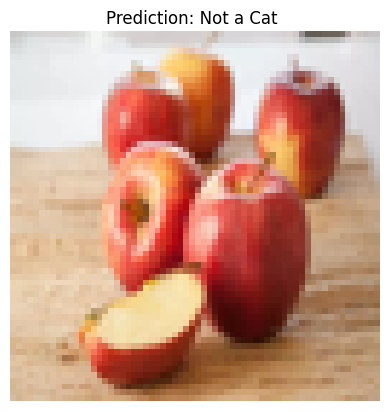

In [6]:
predict_image(r"C:\Users\pssrg\Downloads\Apples-184940975-770x533-1_jpg.webp", W1, W2, b1,b2)
